# GLUCOSE LEVEL PREDICTOR (Time-Series analysis)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_excel("C://Users//yash teotia//Desktop//res_proj//proj.xlsx")

In [3]:
dataset_train.head()

,ID,Time,Record_Type,Historic_Glucose
0,3285870,2019-06-01 12:59:00,0,214
1,3285871,2019-06-01 13:14:00,0,210
2,3285872,2019-06-01 13:29:00,0,199
3,3285873,2019-06-01 13:44:00,0,174
4,3285874,2019-06-01 13:59:00,0,160


In [4]:
trainset = dataset_train.iloc[:,3:4].values

In [5]:
# USED MIN-MAX SCALER TO SCALE THE VALUES TO THE LEVEL OF 0-1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

C:\Users\yash teotia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# CREATING A DATASET  X_TRAIN, Y_TRAIN WHERE WE HAVE LAST 60 VALUES OF X TO 61ST VALUES AS Y WE WILL USE LSTM TO PREDICT NOW
x_train = []
y_train = []
for i in range(60,1198):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1138/1138 [==============================] - 20s 17ms/step - loss: 0.0444
Epoch 2/100
1138/1138 [==============================] - 10s 8ms/step - loss: 0.0285
Epoch 3/100
1138/1138 [==============================] - 8s 7ms/step - loss: 0.0275
Epoch 4/100
1138/1138 [==============================] - 12s 11ms/step - loss: 0.0218
Epoch 5/100
1138/1138 [==============================] - 12s 11ms/step - loss: 0.0165
Epoch 6/100
1138/1138 [==============================] - 11s 10ms/step - loss: 0.0138
Epoch 7/100
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0125
Epoch 8/100
1138/1138 [==============================] - 15s 13ms/step - loss: 0.0106
Epoch 9/100
1138/1138 [==============================] - 12s 11ms/step - loss: 0.

In [10]:
dataset_test =pd.read_excel("C://Users//yash teotia//Desktop//res_proj//res_pro_test.xlsx")

In [11]:
real_stock_price = dataset_test.iloc[:,3:4].values
dataset_total = pd.concat((dataset_train['Historic_Glucose'],dataset_test['Historic_Glucose']),axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values

In [12]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(196, 1)

In [13]:
x_test = []
for i in range(60,196):
    x_test.append(inputs[i-60:i,0])

In [14]:
x_test = np.array(x_test)
x_test.shape
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(136, 60, 1)

In [15]:
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

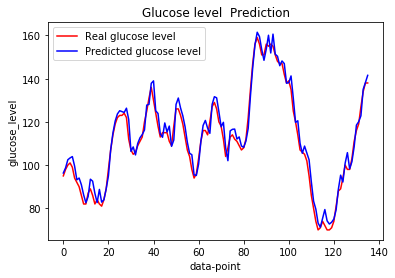

In [16]:
plt.plot(real_stock_price,color = 'red', label = 'Real glucose level')
plt.plot(predicted_price, color = 'blue', label = 'Predicted glucose level')
plt.title('Glucose level  Prediction')
plt.xlabel('data-point')
plt.ylabel('glucose_level')
plt.legend()
plt.show()    